https://www.kaggle.com/datasets/kumarajarshi/life-expectancy-who

Lukas Zetterberg, Khaled Ahmed, Wille Kolu

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [ ]:
df = pd.read_csv('Life Expectancy Data.csv')

df.head(5)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [ ]:
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [ ]:
# Data partitioning into subgroups
developing_df = df[df['Status'] == 'Developing']
developed_df = df[df['Status'] == 'Developed']

# Select numerical columns for PCA
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
numerical_columns.remove('Year')

# Impute missing values using mean strategy
imputer = SimpleImputer(strategy='mean')
developing_df_imputed = imputer.fit_transform(developing_df[numerical_columns])
developed_df_imputed = imputer.fit_transform(developed_df[numerical_columns])

# Data centering and standardize the data
scaler = StandardScaler()
developing_df_scaled = scaler.fit_transform(developing_df_imputed)
developed_df_scaled = scaler.fit_transform(developed_df_imputed)

In [ ]:
developing_cov_matrix = np.cov(developing_df_scaled, rowvar=False)
developed_cov_matrix = np.cov(developed_df_scaled, rowvar=False)
print(developing_cov_matrix, developed_cov_matrix)

[[ 1.00041237e+00 -6.61108321e-01 -1.66514889e-01  1.96573504e-01
   3.44437255e-01  2.07865345e-01 -1.41831590e-01  5.46431926e-01
  -1.95390723e-01  4.32738038e-01  8.95500365e-02  4.55775547e-01
  -5.70678570e-01  3.61521752e-01  3.55515212e-04 -3.62759095e-01
  -3.55884571e-01  6.17530085e-01  6.55723704e-01]
 [-6.61108321e-01  1.00041237e+00  4.66625080e-02 -2.12680281e-02
  -2.02693973e-01 -1.32485284e-01  7.90683961e-03 -3.44910038e-01
   6.22290099e-02 -2.28693874e-01 -9.94493921e-03 -2.31154168e-01
   5.15640017e-01 -2.20010997e-01 -2.76146723e-02  2.07349517e-01
   2.13643393e-01 -3.61274872e-01 -3.59682939e-01]
 [-1.66514889e-01  4.66625080e-02  1.00041237e+00 -6.35659418e-02
  -8.49694245e-02 -1.80307217e-01  4.99420652e-01 -2.20613827e-01
   9.97002319e-01 -1.52968224e-01 -1.20540975e-01 -1.59738360e-01
   8.70760346e-03 -9.63177168e-02  5.50258355e-01  4.61181385e-01
   4.67420330e-01 -1.07210807e-01 -1.66423442e-01]
 [ 1.96573504e-01 -2.12680281e-02 -6.35659418e-02  1.00

In [ ]:
# Calculate eigenvalues and eigenvectors for Developing countries
developing_eigenvalues, developing_eigenvectors = np.linalg.eig(developing_cov_matrix)

# Calculate eigenvalues and eigenvectors for Developed countries
developed_eigenvalues, developed_eigenvectors = np.linalg.eig(developed_cov_matrix)

# Sort eigenvalues and eigenvectors in descending order
developing_sorted_indices = np.argsort(developing_eigenvalues)[::-1]
developing_eigenvalues = developing_eigenvalues[developing_sorted_indices]
developing_eigenvectors = developing_eigenvectors[:, developing_sorted_indices]

developed_sorted_indices = np.argsort(developed_eigenvalues)[::-1]
developed_eigenvalues = developed_eigenvalues[developed_sorted_indices]
developed_eigenvectors = developed_eigenvectors[:, developed_sorted_indices]

# Display the top eigenvalues for each group
developing_eigenvalues[:5], developed_eigenvalues[:5]

(array([5.44096785, 2.76849419, 1.78795407, 1.47543715, 1.38368773]),
 array([4.43662926, 2.48983666, 1.70903003, 1.4375706 , 1.29926658]))

In [ ]:
# Select the top 2 eigenvalues and their corresponding eigenvectors
developing_top_2_eigenvalues = developing_eigenvalues[:2]
developing_top_2_eigenvectors = developing_eigenvectors[:, :2]

developed_top_2_eigenvalues = developed_eigenvalues[:2]
developed_top_2_eigenvectors = developed_eigenvectors[:, :2]

# Display the selected top 2 eigenvalues and eigenvectors
print("Selected top 2 eigenvalues and eigenvectors for Developing countries:\n", developing_top_2_eigenvalues, developing_top_2_eigenvectors)
print("Selected top 2 eigenvalues and eigenvectors for Developed countries:\n", developed_top_2_eigenvalues, developed_top_2_eigenvectors)


Selected top 2 eigenvalues and eigenvectors for Developing countries:
 [5.44096785 2.76849419] [[ 0.33881457 -0.22618353]
 [-0.22115334  0.22590533]
 [-0.22633543 -0.45259186]
 [ 0.14636103 -0.03708467]
 [ 0.19940983 -0.16083867]
 [ 0.14520495 -0.00255391]
 [-0.1469945  -0.27924914]
 [ 0.29451357 -0.05367068]
 [-0.23366847 -0.44247206]
 [ 0.22192763 -0.10357807]
 [ 0.09034181  0.08933783]
 [ 0.23218257 -0.10775558]
 [-0.1563536   0.18471459]
 [ 0.20995473 -0.17519713]
 [-0.10481515 -0.37113535]
 [-0.29205473 -0.19813351]
 [-0.29139119 -0.20079443]
 [ 0.28689498 -0.20985552]
 [ 0.31064745 -0.18051279]]
Selected top 2 eigenvalues and eigenvectors for Developed countries:
 [4.43662926 2.48983666] [[-0.36237316  0.1167666 ]
 [ 0.28853674 -0.00308317]
 [-0.04861545 -0.58191765]
 [ 0.07227342  0.01069371]
 [-0.2618349   0.24985866]
 [ 0.1079127   0.07378113]
 [ 0.00125925 -0.01962422]
 [-0.02903828 -0.08089465]
 [-0.04898583 -0.58128245]
 [ 0.07291391  0.19810942]
 [-0.15265914 -0.37004586]


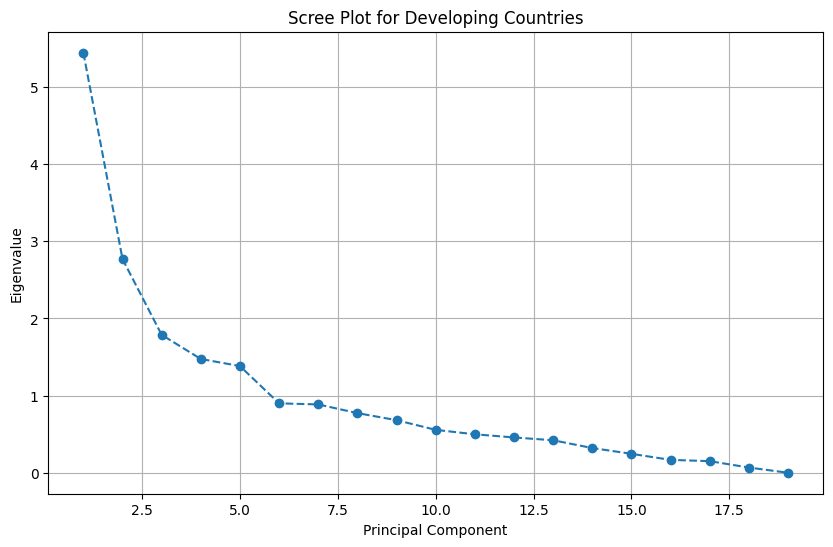

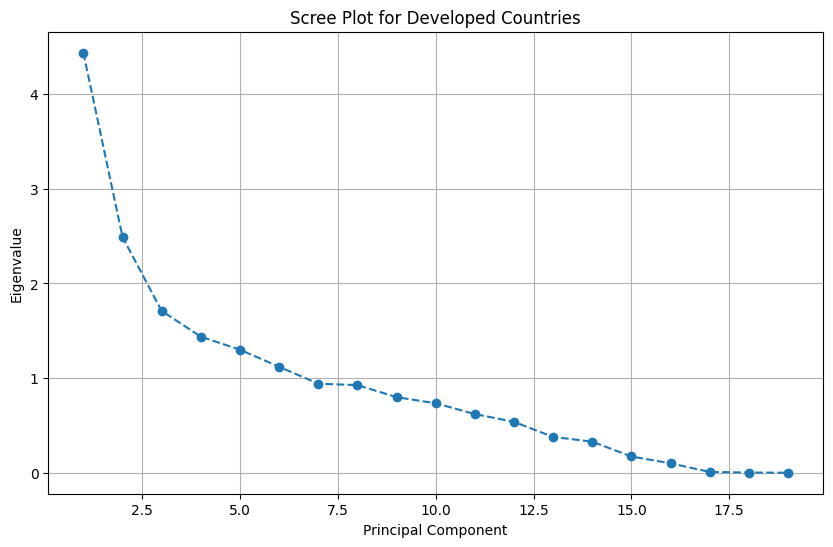

In [ ]:
# Scree plot for Developing countries
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(developing_eigenvalues) + 1), developing_eigenvalues, marker='o', linestyle='--')
plt.title('Scree Plot for Developing Countries')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.grid(True)
plt.show()

# Scree plot for Developed countries
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(developed_eigenvalues) + 1), developed_eigenvalues, marker='o', linestyle='--')
plt.title('Scree Plot for Developed Countries')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.grid(True)
plt.show()

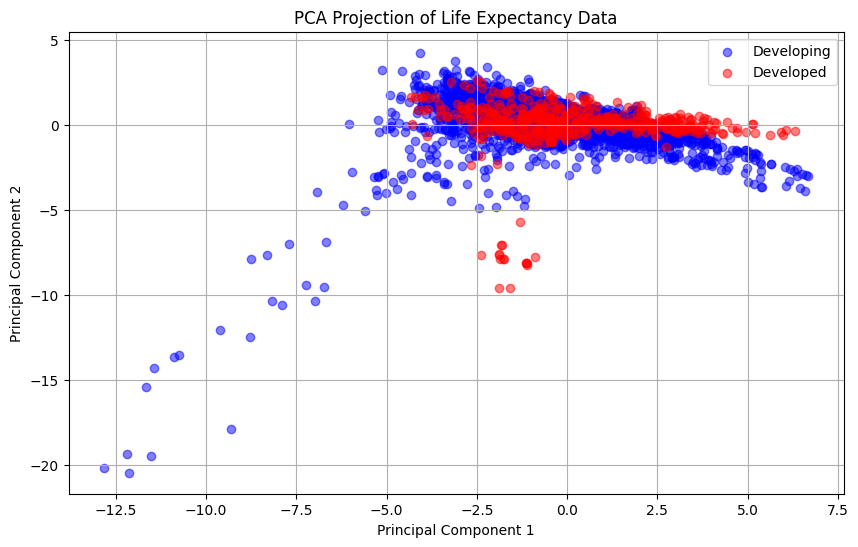

In [ ]:
# Project the Developing data onto the top 2 principal components
developing_projected_data = developing_df_scaled @ developing_top_2_eigenvectors

# Project the Developed data onto the top 2 principal components
developed_projected_data = developed_df_scaled @ developed_top_2_eigenvectors

# Create a scatter plot
plt.figure(figsize=(10, 6))

# Plot Developing countries
plt.scatter(developing_projected_data[:, 0], developing_projected_data[:, 1], 
            color='blue', label='Developing', alpha=0.5)

# Plot Developed countries
plt.scatter(developed_projected_data[:, 0], developed_projected_data[:, 1], 
            color='red', label='Developed', alpha=0.5)

plt.title('PCA Projection of Life Expectancy Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()


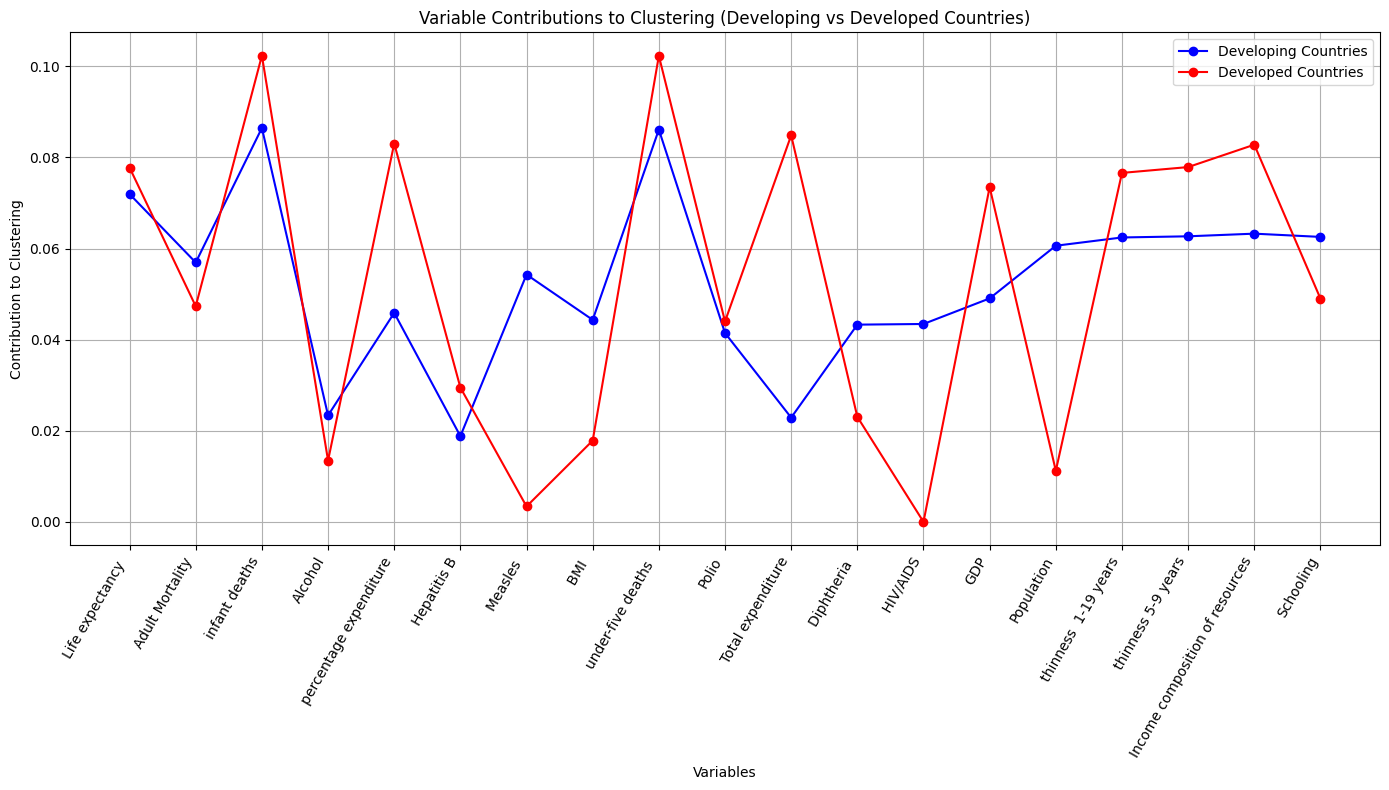

In [ ]:
# Sum the absolute values of the contributions across the top two principal components
developing_contributions_total = np.sum(np.abs(developing_top_2_eigenvectors), axis=1)
developed_contributions_total = np.sum(np.abs(developed_top_2_eigenvectors), axis=1)

# Normalize the contributions to sum to 1 (or 100%)
developing_contributions_total /= np.sum(developing_contributions_total)
developed_contributions_total /= np.sum(developed_contributions_total)

# Plot the contributions for both Developing and Developed countries on the same graph
plt.figure(figsize=(14, 8))
plt.plot(numerical_columns, developing_contributions_total, marker='o', color='blue', label='Developing Countries')
plt.plot(numerical_columns, developed_contributions_total, marker='o', color='red', label='Developed Countries')
plt.title('Variable Contributions to Clustering (Developing vs Developed Countries)')
plt.xlabel('Variables')
plt.ylabel('Contribution to Clustering')
plt.xticks(rotation=60, ha='right', fontsize=10)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# Select the top 3 eigenvalues and their corresponding eigenvectors
developing_top_3_eigenvalues = developing_eigenvalues[:3]
developing_top_3_eigenvectors = developing_eigenvectors[:, :3]

developed_top_3_eigenvalues = developed_eigenvalues[:3]
developed_top_3_eigenvectors = developed_eigenvectors[:, :3]

# Display the selected top 3 eigenvalues and eigenvectors
print("Selected top 3 eigenvalues and eigenvectors for Developing countries:\n", developing_top_3_eigenvalues, developing_top_3_eigenvectors)
print("Selected top 3 eigenvalues and eigenvectors for Developed countries:\n", developed_top_3_eigenvalues, developed_top_3_eigenvectors)


Selected top 3 eigenvalues and eigenvectors for Developing countries:
 [5.44096785 2.76849419 1.78795407] [[ 0.33881457 -0.22618353  0.06584719]
 [-0.22115334  0.22590533 -0.06304192]
 [-0.22633543 -0.45259186 -0.05200418]
 [ 0.14636103 -0.03708467 -0.21471133]
 [ 0.19940983 -0.16083867 -0.35100288]
 [ 0.14520495 -0.00255391  0.48474518]
 [-0.1469945  -0.27924914 -0.07848006]
 [ 0.29451357 -0.05367068 -0.13081   ]
 [-0.23366847 -0.44247206 -0.0630587 ]
 [ 0.22192763 -0.10357807  0.41278335]
 [ 0.09034181  0.08933783 -0.04529371]
 [ 0.23218257 -0.10775558  0.44082955]
 [-0.1563536   0.18471459 -0.09224787]
 [ 0.20995473 -0.17519713 -0.29276496]
 [-0.10481515 -0.37113535 -0.03513246]
 [-0.29205473 -0.19813351  0.21328023]
 [-0.29139119 -0.20079443  0.21358244]
 [ 0.28689498 -0.20985552 -0.05127539]
 [ 0.31064745 -0.18051279 -0.03865387]]
Selected top 3 eigenvalues and eigenvectors for Developed countries:
 [4.43662926 2.48983666 1.70903003] [[-0.36237316  0.1167666  -0.09829572]
 [ 0.288

In [ ]:
import plotly.graph_objs as go

# Ensure that you have selected the top 3 eigenvectors for projection
developing_top_3_eigenvalues = developing_eigenvalues[:3]
developing_top_3_eigenvectors = developing_eigenvectors[:, :3]

developed_top_3_eigenvalues = developed_eigenvalues[:3]
developed_top_3_eigenvectors = developed_eigenvectors[:, :3]

# Project the Developing data onto the top 3 principal components
developing_projected_data = developing_df_scaled @ developing_top_3_eigenvectors

# Project the Developed data onto the top 3 principal components
developed_projected_data = developed_df_scaled @ developed_top_3_eigenvectors

# Create the 3D scatter plot for Developing countries
trace_developing = go.Scatter3d(
    x=developing_projected_data[:, 0],
    y=developing_projected_data[:, 1],
    z=developing_projected_data[:, 2],
    mode='markers',
    marker=dict(size=5, color='blue', opacity=0.8),
    name='Developing'
)

# Create the 3D scatter plot for Developed countries
trace_developed = go.Scatter3d(
    x=developed_projected_data[:, 0],
    y=developed_projected_data[:, 1],
    z=developed_projected_data[:, 2],
    mode='markers',
    marker=dict(size=5, color='red', opacity=0.8),
    name='Developed'
)

# Combine the traces
data = [trace_developing, trace_developed]

# Define the layout
layout = go.Layout(
    title='Interactive 3D PCA Projection of Life Expectancy Data',
    scene=dict(
        xaxis_title='Principal Component 1',
        yaxis_title='Principal Component 2',
        zaxis_title='Principal Component 3'
    ),
    legend=dict(x=0.8, y=0.9)
)

# Create the figure
fig = go.Figure(data=data, layout=layout)

# Show the plot
fig.show()



<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=07f04956-ee14-40fc-95b0-1a7d4d984635' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>